In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **SUL DATASET**

Il dataset è una versione pre-processata del dataset **OASIS Alzheimer's Detection** (un dataset di immagini MRI del cervello di 461 pazienti) utilizzato per rilevare i segni precoci dell’Alzheimer.

Poiché le immagini MRI sono 3D, sono state divise lungo l'asse z (l'asse della profondità del cervello) in 175 fette e sono state selezionate le fette che vanno dalla 55 esima alla 124 esima al fine di ridurre il numero di immagini e concentrarsi sulle sezioni cerebrali rilevanti per l'analisi della demenza; Questo approccio ha generato immagini 2D per ogni paziente.

Lo stesso approccio è stato utilizzato per le versioni delle MRI con segmentazione delle aree cerebrali offerte da OASIS.

****
****

Le immagini sono classificate in **quattro sottoclassi**, in base alla progressione della malattia:

*   Moderate dementia (affetto da demenza)

*   Very mild dementia (affetto da demenza molto lieve)
* Mild dementia (affetto da demenza lieve)
* Non-demented (non affetto da demenza)


*La classificazione dei pazienti è stata effettuata sulla base delle valutazioni CDR (Clinical Dementia Rating), un punteggio che valuta la severità della demenza.*



In [38]:
#estrazione dataset
import zipfile
import os

zip_path = "/content/drive/My Drive/Alzheimer-detection-project/oasis 1.zip"
extract_folder = "/content/Alzheimer-detection-project"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("File estratti:", os.listdir(extract_folder))


File estratti: ['oasis 1', '__MACOSX']


In [ ]:
oasis1_path = os.path.join(extract_folder, "oasis 1")
print(os.listdir(oasis1_path))

['Very Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Mild Dementia', '.DS_Store']


In [ ]:
category_path = os.path.join(oasis1_path, "Moderate Dementia")
print(os.listdir(category_path))

['mri scan', 'mri segmented', '.DS_Store']


In [ ]:
mri_path= os.path.join(category_path, "mri scan")
print(os.listdir(mri_path))

['OAS1_0351MR1 ', '.DS_Store', 'OAS1_0308MR1 ']


In [45]:
# numero di immagini per categoria
dementia_categories = ['Moderate Dementia', 'Mild Dementia', 'Very Mild Dementia', 'Non Demented']
somma=0

for category in dementia_categories:
    category_path = os.path.join(oasis1_path, category)
    mri_path= os.path.join(category_path, 'mri scan')
    for patient in os.listdir(mri_path):
      if patient == ".DS_Store":
        continue
      patient_path=os.path.join(mri_path, patient)
      file_path=os.path.join(patient_path, '.DS_Store')
      if os.path.isfile(file_path):
        os.remove(file_path)
      images= os.listdir(os.path.join(mri_path, patient))
      somma=somma+len(images)
    print(f"{category}: {somma} immagini mri ")
    somma=0

for category in dementia_categories:
    category_path = os.path.join(oasis1_path, category)
    mri_segmented_path=os.path.join(category_path, 'mri segmented')
    for patient in os.listdir(mri_segmented_path):
      if patient == ".DS_Store":
        continue
      patient_path=os.path.join(mri_segmented_path, patient)
      file_path=os.path.join(patient_path, '.DS_Store')
      if os.path.isfile(file_path):
        os.remove(file_path)
      images= os.listdir(os.path.join(mri_segmented_path, patient))
      somma=somma+len(images)
    print(f"{category}: {somma} immagini mri segmentate")
    somma=0

Moderate Dementia: 140 immagini mri 
Mild Dementia: 1960 immagini mri 
Very Mild Dementia: 5006 immagini mri 
Non Demented: 23520 immagini mri 
Moderate Dementia: 140 immagini mri segmentate
Mild Dementia: 1960 immagini mri segmentate
Very Mild Dementia: 5006 immagini mri segmentate
Non Demented: 23520 immagini mri segmentate


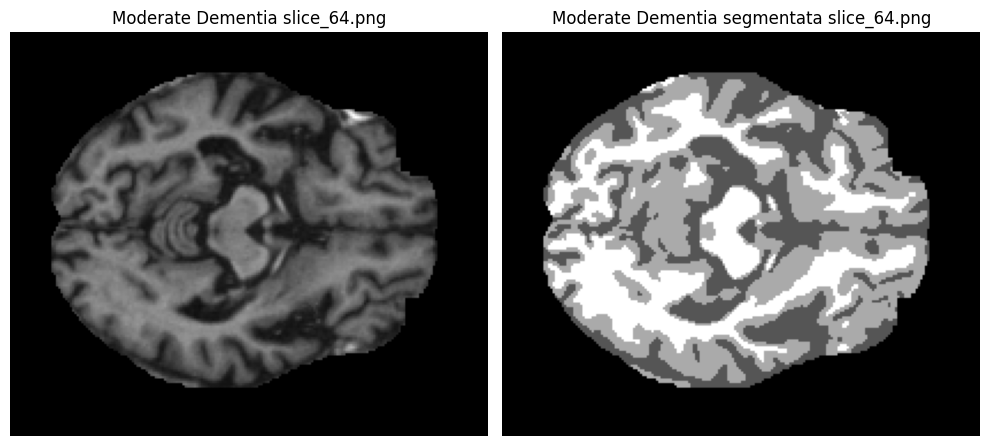

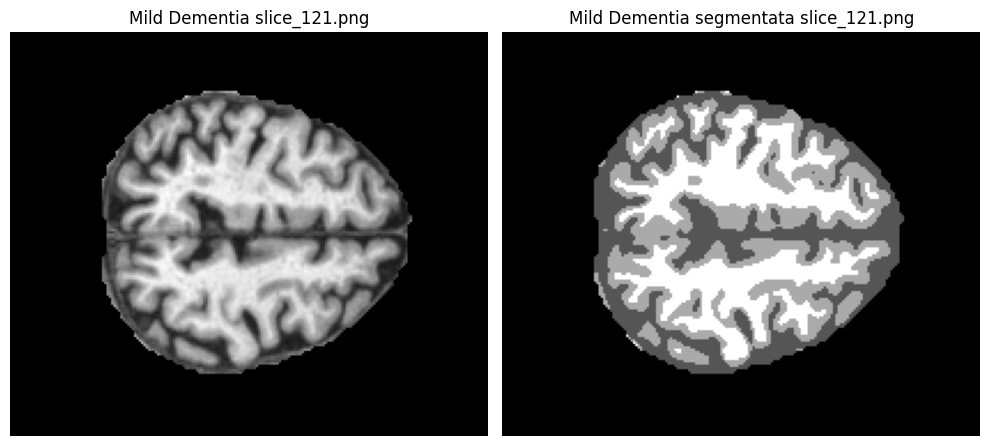

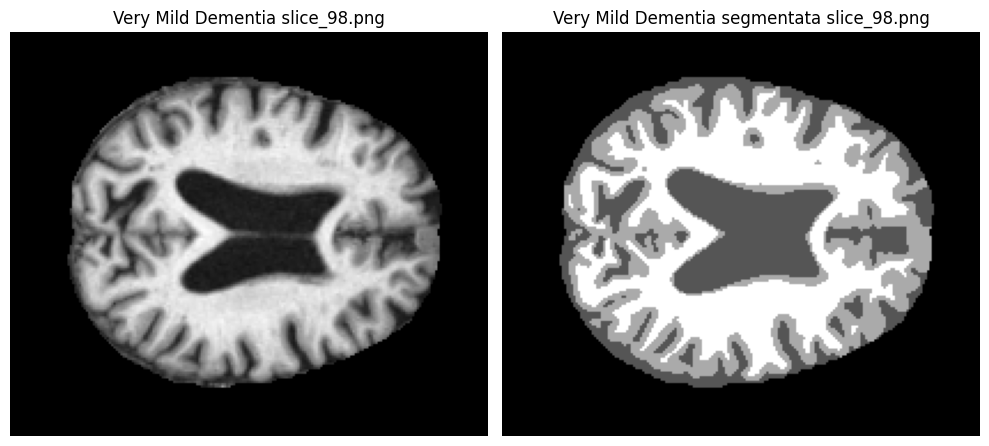

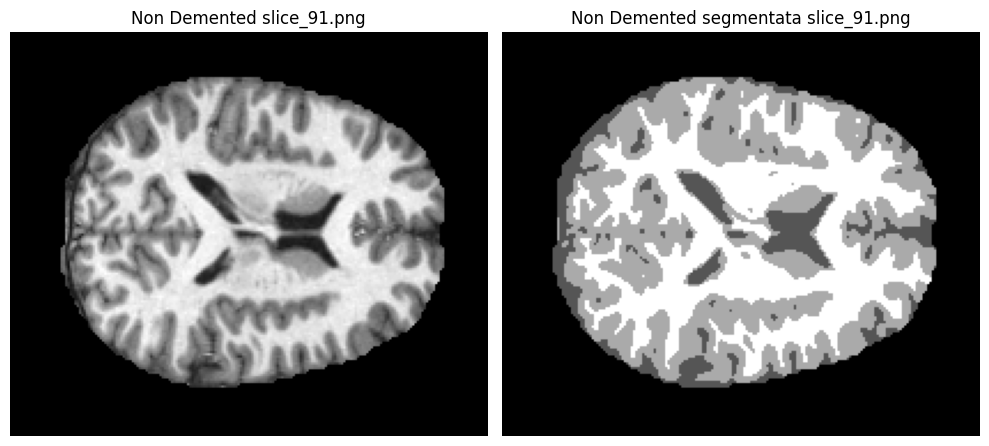

In [56]:
#visualizzazione di immagini a campione

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

for category in dementia_categories:
  category_path = os.path.join(oasis1_path, category)
  mri_segmented_path=os.path.join(category_path, 'mri segmented')
  mri_path= os.path.join(category_path, 'mri scan')
  random_folder = random.choice(os.listdir(mri_path))
  random_folder_seg= f"{random_folder}seg"

  patient_path= os.path.join(mri_path, random_folder)
  patient_path_seg= os.path.join(mri_segmented_path, random_folder_seg)

  random_slice = random.choice(os.listdir(patient_path))
  img_path = os.path.join(patient_path, random_slice)
  img = mpimg.imread(img_path)

  img_seg_path = os.path.join(patient_path_seg, random_slice)
  img_seg = mpimg.imread(img_seg_path)

  fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 riga, 2 colonne

  axes[0].imshow(img)
  axes[0].set_title(f"{category} {random_slice}")
  axes[0].axis('off')

  axes[1].imshow(img_seg)
  axes[1].set_title(f"{category} segmentata {random_slice}")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

